In [5]:
# Importations
import numpy as np
import pandas as pd
import os

In [6]:
os.getcwd()

'C:\\Users\\emouhou\\Frederic'

In [2]:
def annualised_returns(m_perf, frequency=12):
    """
    Cette fonction calcule et renvoie le rendement annualise.

    Args:
    m_perf: numpy array de rendements mensuels
    frequency: frequence des donnees. Par defaut, c'est 12 (pour les donnees mensuelles)

    Returns:
    an_perf: le rendement annualise
    """

    an_perf = (np.prod(1 + m_perf/100) ** (frequency/m_perf.size) - 1)*100
    print("Annualised Performance =", an_perf)
    return an_perf

In [3]:
def fund_volatility(m_perf, frequency=12):
    """
    Cette fonction calcule et renvoie la volatilite annualisee d'un fonds.

    Args:
    m_perf: numpy array de rendements mensuels
    frequency: frequence des donnees. Par defaut, c'est 12 (pour les donnees mensuelles)

    Returns:
    vol: la volatilite annualisee du fonds
    """
    stdv = np.std(m_perf)
    vol = stdv * np.sqrt(frequency)
    print("Annualised Volatility =", vol)
    return vol

In [4]:
def calculate_drawdown(m_perf, frequency=12):
    """
    Cette fonction calcule et renvoie le drawdown et le maximum drawdown.

    Args:
    m_perf: numpy array de rendements mensuels
    frequency: frequence des donnees. Par defaut, c'est 12 (pour les donnees mensuelles)

    Returns:
    drawdowns: numpy array des drawdowns
    max_dd: le maximum drawdown
    """
    monthly_values = np.array([100 * (1 + i/100) for i in m_perf])
    high_water_mark = np.maximum.accumulate(monthly_values)
    drawdowns = high_water_mark - monthly_values
    max_dd = np.max(drawdowns)
    print("Maximum Drawdown =", max_dd)
    return drawdowns, max_dd

In [80]:
def time_to_recovery(m_perf, frequency=12):
    """
    Cette fonction calcule et renvoie le temps de recuperation.

    Args:
    m_perf: numpy array de rendements mensuels
    frequency: frequence des donnees. Par defaut, c'est 12 (pour les donnees mensuelles)

    Returns:
    ttr_max: le temps de recuperation maximum
    """
    dd, dd_max = calculate_drawdown(m_perf)
    im_dd = dd.argmax()
    ttr_max = np.where(dd[im_dd:] == 0)[0]
    if ttr_max.size != 0:
        ttr_max = ttr_max[0]
        save_idx = im_dd
    else:
        last_0 = np.where(dd==0)[0][-1]
        dd2 = dd[:last_0+1]
        im_dd2 = dd2.argmax()
        ttr_max2 = np.where(dd2[im_dd2:] == 0)[0]
        #print(dd2, dd2[im_dd2:], im_dd2, ttr_max2)
        print(len(dd[im_dd:]), ttr_max2[0])
        if len(dd[im_dd:]) < ttr_max2[0]:
            ttr_max = ttr_max2[0]
        else :
            ttr_max = len(dd[im_dd:])
        save_idx = im_dd2
        
    print("Time to Recovery Max =", ttr_max)

    return dd, save_idx, ttr_max

In [93]:
np.random.seed(42)
num_points = [60, 1000, 1000]
means = [2, 1, 1]
stds = [3, 2, 0.5]
frequency = 12

# Calculs
for i in range(3):
    # Generation des rendements mensuels en utilisant une distribution normale
    Monthly_Perf = np.random.normal(
        means[i], stds[i], num_points[i]).round(2)
    m_perf = pd.Series(Monthly_Perf).rolling(20).mean().dropna()
    print(f"\nCalculations for data set {i+1}:")
    # Calcul du rendement annualise
    annualised_returns(m_perf)
    # Calcul de la volatilite annualisee
    fund_volatility(m_perf)
    # Calcul du drawdown
    calculate_drawdown(m_perf)
    # Calcul du temps de recuperation
    dd, save_idx, ttr = time_to_recovery(m_perf)


Calculations for data set 1:
Annualised Performance = 14.653645752956068
Annualised Volatility = 1.1376562054855734
Maximum Drawdown = 1.1714999999999947
Maximum Drawdown = 1.1714999999999947
Time to Recovery Max = 28

Calculations for data set 2:
Annualised Performance = 13.867088695419039
Annualised Volatility = 1.5255852528719365
Maximum Drawdown = 2.3095
Maximum Drawdown = 2.3095
66 238
Time to Recovery Max = 238

Calculations for data set 3:
Annualised Performance = 13.020018302192149
Annualised Volatility = 0.3674463654383368
Maximum Drawdown = 0.5360000000000156
Maximum Drawdown = 0.5360000000000156
43 145
Time to Recovery Max = 145


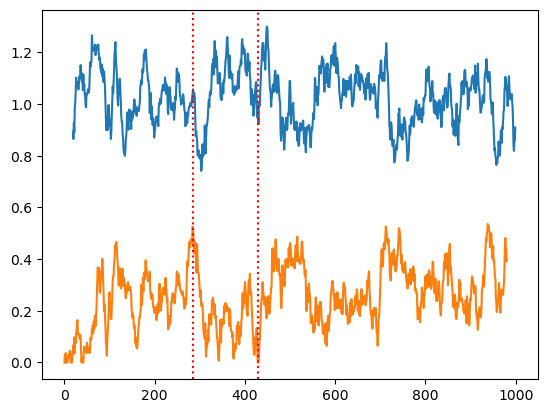

In [96]:
plt.plot(m_perf)
plt.plot(dd)
plt.axvline(x=save_idx, c="r", ls=":")
plt.axvline(x=(save_idx+ttr), c="r", ls=":")
plt.show()

In [52]:
import pandas as pd

In [53]:
Monthly_Perf = np.random.normal(
        means[i], stds[i], num_points[i]).round(2)
ser = pd.Series(Monthly_Perf)

In [59]:
ser2 = ser.rolling(5).mean()

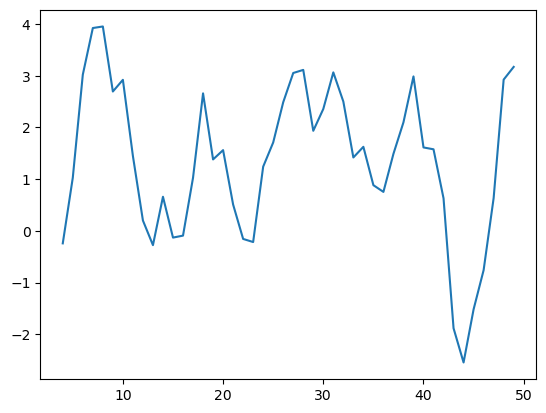

In [60]:
plt.plot(ser2)
plt.show()